In [17]:
import networkx as nx
import pandas as pd
import numpy as np
import random 
import scipy.stats as stats
import matplotlib.pyplot as plt
import sys, os
import warnings
import processing_module as pm

Создадим две синтетические последовательности из распределения Парето с разными параметрами.
Функция распределения Парето:
$$
F(x) = 1 - \left(\frac{x_m}{x}\right)^k, \quad x \geq x_m,
$$
где $x_m$ - минимальное значение, а $k$ - параметр формы.

Для тестов сконкатенируем последовательности

In [18]:
a1, k1 = 3., 2.  # форма и режим
a2, k2 = 5., 3.
s1 = (np.random.pareto(a1, 1000) + 1) * k1
s2 = (np.random.pareto(a2, 1000) + 1) * k2

In [19]:
X = np.concatenate((s1, s2), axis=0)
X_2 = np.concatenate((s1, s2[:100]), axis=0)
print(len(X))
print(len(X2))

2000
1100


In [20]:
def plot_est_bs(input, name='Hill'):
    val_mean = input[0]
    val_up = input[1]
    val_dn = input[2] 
    legend = []

    y, k_find = pm.eye_ball(val_mean)
    
    plt.plot(val_up)
    legend.append("Нижняя грань доверительного интервала")
    plt.plot(val_dn)
    legend.append("Верхняя грань доверительного интервала")
    plt.plot(val_mean)    
    legend.append(f"{name}'s plot")
    
    plt.axhline(y, color = 'r', linestyle = '-')
    legend.append(f"Интервал стабильности")
    print(f"{y} Интервал стабильности")
    
    plt.ylim(0, 0.5)
    
    plt.xlabel('k') #Подпись для оси х
    plt.ylabel(name) #Подпись для оси y
    plt.legend(legend, loc="upper left")
    plt.title(f"{name}'s estimator с доверительным интервалом") #Название
    
    plt.show()

In [21]:
interval = 0.9
output_1 = pm.bootstrap_est(X, interval, func=pm.hill)
output_2 = pm.bootstrap_est(X_2, interval, func=pm.hill)

0.24290828985198462 Интервал стабильности


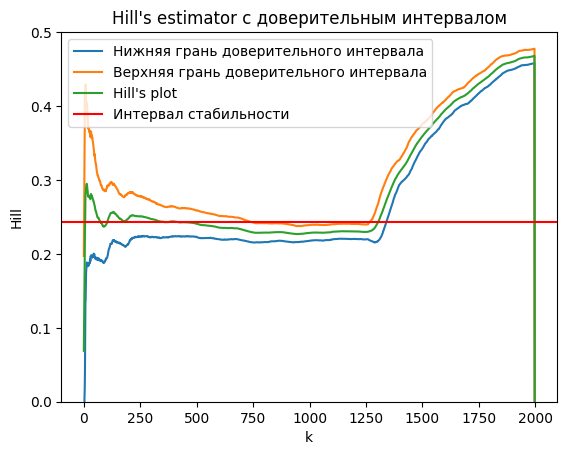

0.30728257710535667 Интервал стабильности


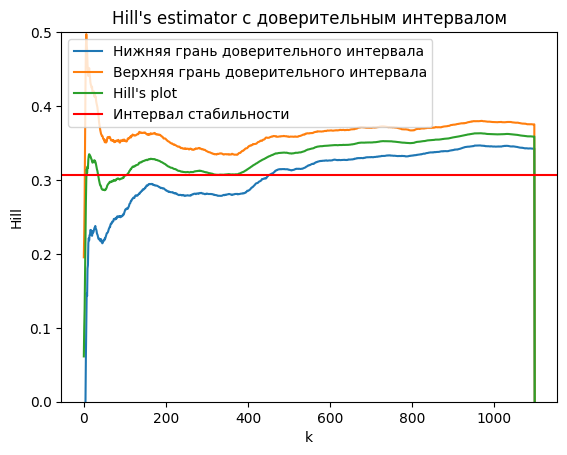

In [22]:
plot_est_bs(output_1, name='Hill')
plot_est_bs(output_2, name='Hill')

<span style="color:orange">
    
## Global estimator ##

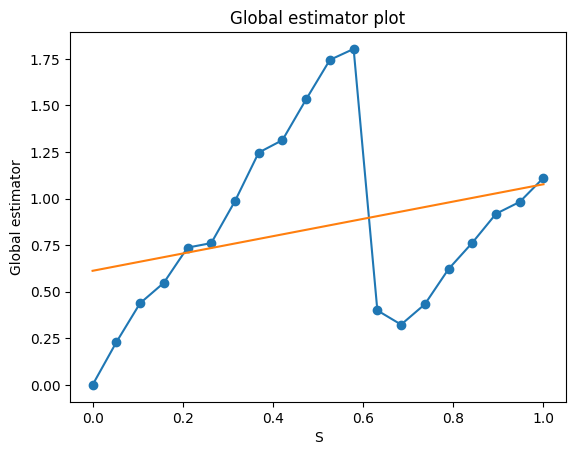

In [23]:
list_step, list_tt = pm.test_tail_index(X, amount=100)

plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
#plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()

<span style="color:orange">

## Тест Phillips and Loretan для разных последовательностей ##


In [24]:
Num_1 = pm.phillips_loretan(s1, s2)
Num_2 = pm.phillips_loretan(X, X2)

print(pm.phillips_loretan(s1, s1))
print(pm.phillips_loretan(s1, s2))
print(pm.phillips_loretan(X, X2))

0.0
38.077072510755386
26.65985670021978


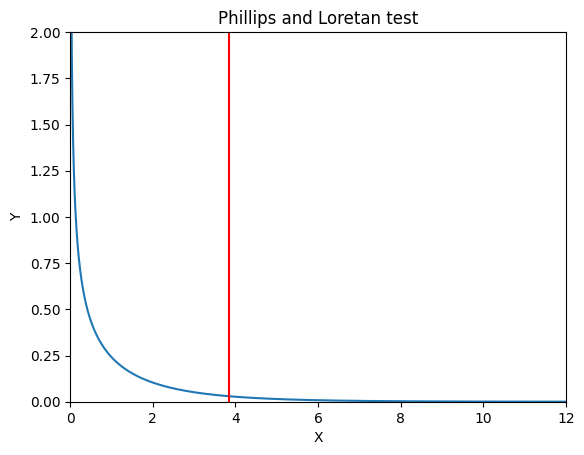

In [25]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange (0, 20, 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, stats.chi2.pdf(x, df=1)) 
plt.axvline(x=3.841, color="red")
plt.axvline(x=Num_1, color="blue")
plt.axvline(x=Num_2, color="green")

plt.xlim(0, 12)
plt.ylim(0, 2)
plt.xlabel('X') #Подпись для оси х
plt.ylabel('Y') #Подпись для оси y
plt.title('Phillips and Loretan test') #Название
plt.show()

<span style="color:orange">

Распреджеление хи квадрат с одной степенью свободы. 
Красным отмечена граница 5% уровня значимости.
Зелёным и синим отмечены тесты Phillips and Loretan для разных последовательностей (X, X2), (s1, s2) 
соответственно.

<span style="color:orange">

## Последовательности обрахованные по средствам Preferential Attachment ##
Начальные условия PA для столбцов следующие:
| столбец | \alpha | \beta | \gamma |
|---------|--------|-------|--------|
| 1       | 0.3  | 0.6  | 0.1   |
| 2       | 0.4  | 0.2  | 0.4   |
| 3       | 0.1  | 0.8  | 0.1   |

Каждое значение - услованая вероятность.


In [26]:
my_path = os.path.abspath("") + "/.."
data = pd.read_csv(my_path + "/Data_initial" + '/p-k.csv', delimiter=',')

In [27]:
print(data)

            1         2         3
0    0.450000  0.375000  0.100000
1    0.636000  0.500000  0.326000
2    0.714000  0.478125  0.420000
3    0.576457  0.477551  0.388363
4    0.753000  0.436500  0.510942
..        ...       ...       ...
995  0.681714  0.216444  0.728530
996  0.615374  0.171257  0.802924
997  0.678233  0.239372  0.778277
998  0.679242  0.267067  0.792593
999  0.663396  0.170566  0.768513

[1000 rows x 3 columns]


In [28]:
seq_1 = data['1']
seq_2 = data['2']
seq_3 = data['3']

gammah1 = pm.hill(seq_1)
gammah2 = pm.hill(seq_2)
gammah3 = pm.hill(seq_3)

In [29]:
plot_est(gammah1, label='Hill_estimator1')
plot_est(gammah2, label='Hill_estimator2')
plot_est(gammah3, label='Hill_estimator3')

NameError: name 'plot_est' is not defined

In [ ]:
Num_1 = pm.phillips_loretan(seq_1, seq_2)
Num_2 = pm.phillips_loretan(seq_1, seq_3)
Num_3 = pm.phillips_loretan(seq_2, seq_3)
print('seq_1, seq_2', Num_1)
print('seq_1, seq_3', Num_2)
print('seq_2, seq_3', Num_3)

In [ ]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange (0, 20, 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, stats.chi2.pdf(x, df=1)) 
plt.axvline(x=3.841, color="red")
plt.axvline(x=Num_1, color="blue")
plt.axvline(x=Num_2, color="green")
plt.axvline(x=Num_3, color="orange")

plt.xlim(0, 12)
plt.ylim(0, 2)
plt.xlabel('X') #Подпись для оси х
plt.ylabel('Y') #Подпись для оси y
plt.title('Phillips and Loretan test') #Название
plt.show()

In [ ]:
list_step, list_tt = pm.test_tail_index(seq_1, amount=100)

plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
#plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()

In [ ]:
list_step, list_tt = pm.test_tail_index(seq_2, amount=100)

plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
#plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()

In [ ]:
list_step, list_tt = pm.test_tail_index(seq_3, amount=100)

plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
#plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()